/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:04:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of XGBoost model: 58.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        36
           1       0.27      0.33      0.30         9
           2       0.11      0.20      0.14         5
           3       0.25      0.14      0.18         7
           4       0.00      0.00      0.00         3

    accuracy                           0.58        60
   macro avg       0.30      0.30      0.30        60
weighted avg       0.61      0.58      0.59        60



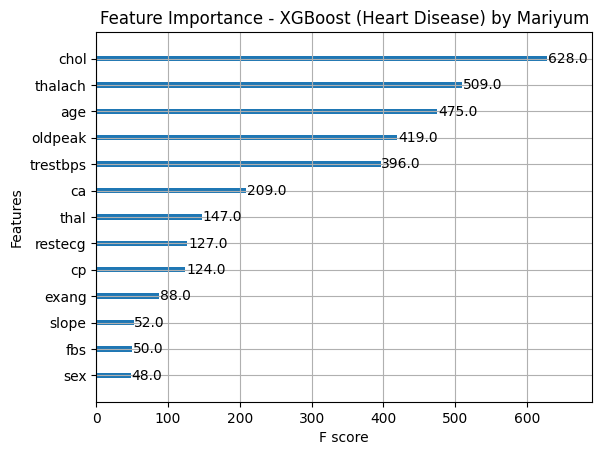

In [9]:
# Step 1: Install XGBoost if not installed
# !pip install xgboost

# Step 2: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Step 3: Load the Heart Disease dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(data_url, header=None, names=column_names, na_values='?')

# Step 4: Preprocess the data
df.dropna(inplace=True)
X = df.drop('target', axis=1)
y = df['target']

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Create the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Step 7: Train the model
xgb_model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = xgb_model.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of XGBoost model: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Feature Importance Plot
xgb.plot_importance(xgb_model)
plt.title('Feature Importance - XGBoost (Heart Disease) by Mariyum')
plt.show()


In [10]:
# Step 1: Install CatBoost if not installed
# !pip install catboost

# Step 2: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier

# Step 3: Load the Pima Indians Diabetes dataset
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(data_url, names=column_names)

# Step 4: Define features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize and train the CatBoost model
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=100)
catboost_model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = catboost_model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of CatBoost model: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Feature Importance Plot
feature_importances = catboost_model.get_feature_importance(prettified=True)
print("\nFeature Importance 211P023:")
print(feature_importances)


0:	learn: 0.6450126	total: 1.96ms	remaining: 976ms
100:	learn: 0.1735678	total: 151ms	remaining: 596ms
200:	learn: 0.0757838	total: 304ms	remaining: 452ms
300:	learn: 0.0400556	total: 452ms	remaining: 299ms
400:	learn: 0.0248039	total: 606ms	remaining: 150ms
499:	learn: 0.0178761	total: 756ms	remaining: 0us

Accuracy of CatBoost model: 71.43%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.59      0.67      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154


Feature Importance 211P023:
                 Feature Id  Importances
0                   Glucose    20.514785
1                       BMI    15.914529
2  DiabetesPedigreeFunction    14.911267
3                       Age    14.069671
4             BloodPressure    10.209205
5               Pregnancies  

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947

Mean Absolute Error of LightGBM model: 0.28


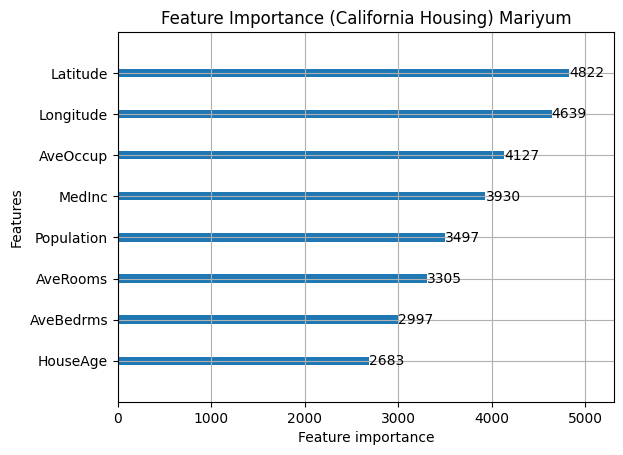

In [11]:
# Step 1: Install LightGBM if not installed
# !pip install lightgbm

# Step 2: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb

# Step 3: Load the California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Create and train the LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05)
lgb_model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = lgb_model.predict(X_test)

# Step 7: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"\nMean Absolute Error of LightGBM model: {mae:.2f}")

# Step 8: Feature Importance Plot
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='split', title='Feature Importance (California Housing) Mariyum')
plt.show()
